## Introdução ao Quandl - Indicadores Macroeconomicos

Quandl é uma biblioteca para coletar dados macroeconomicos, diferente do pandas.data_reader para dados do mercado financeiro.

In [77]:
import quandl
from pandas_datareader import data
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from functools import reduce

Para termos acesso ao API da biblioteca quandl, temos que cadastrar no site para receber uma API_KEY. O API_KEY será enviado por email após a confirmação do cadastro.

https://www.quandl.com/sign-up

In [2]:
key = open("api_key.txt")

token = key.read()

In [3]:
quandl.ApiConfig.api_key = token

- Petróleo WTI dos USA

In [4]:
wti_crude = quandl.get('EIA/PET_RWTC_D')

In [5]:
type(wti_crude)

pandas.core.frame.DataFrame

In [6]:
wti_crude.head()

,Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


In [7]:
wti_crude.tail()

,Value
Date,
2020-04-07,23.54
2020-04-08,24.97
2020-04-09,22.90
2020-04-13,22.36
2020-04-14,20.15


In [8]:
wti_crude = wti_crude.rename(columns = {'Value':'Petroleo'})

In [9]:
wti_crude

,Petroleo
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87
...,...
2020-04-07,23.54
2020-04-08,24.97
2020-04-09,22.90


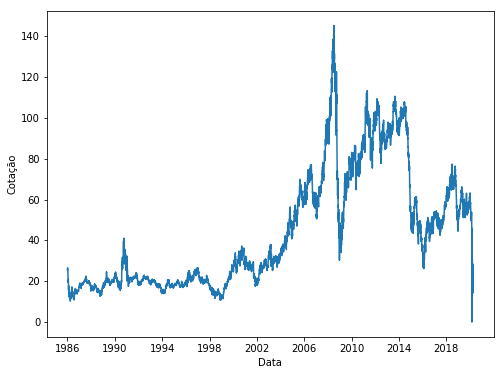

In [10]:
plt.subplots(figsize=(8,6))

plt.plot(wti_crude)
#plt.figure

plt.xlabel('Data')
plt.ylabel('Cotação')

plt.show()

 - PIB dos Estados Unidos

In [11]:
PIB_US = quandl.get('FRED/GDP',start_end = '2001-12-31',end_date ='2020-04-01')


In [12]:
PIB_US

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2018-10-01,20897.804
2019-01-01,21098.827
2019-04-01,21340.267


In [16]:
PIB_US = PIB_US.loc['2010-01-01':'2019-10-01']

In [17]:
PIB_US = PIB_US.rename(columns = {'Value':'PIB USA'})

In [45]:
PIB_US.head()

,PIB USA
Date,
2010-01-01,14721.350
2010-04-01,14926.098
2010-07-01,15079.917
2010-10-01,15240.843
2011-01-01,15285.828


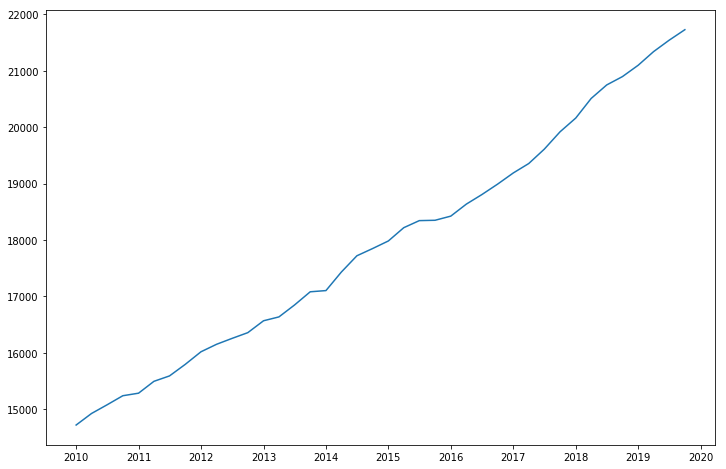

In [24]:
plt.subplots(figsize=(12,8))
plt.plot(PIB_US)
plt.show()

- Indice do Bovespa (Ibovespa)

In [19]:
ibov = quandl.get('BCB/7845', start_end = '2000-01-01',end_date ='2020-04-01')

In [20]:
ibov.head()

,Value
Date,
1983-07-31,62064.0
1983-08-31,67535.0
1983-09-30,90427.0
1983-10-31,1258.0
1983-11-30,1678.0


In [21]:
ibov = ibov.loc['2010-01-01':'2020-01-01']

In [29]:
ibov = ibov.rename(columns = {'Value':'Ibovespa'})

In [44]:
ibov.head()

,Ibovespa
Date,
2010-01-31,65402.0
2010-02-28,66503.0
2010-03-31,70371.0
2010-04-30,67530.0
2010-05-31,63044.0


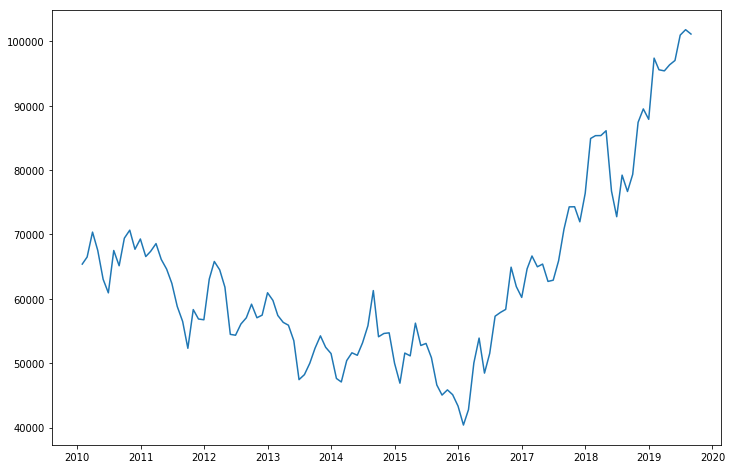

In [30]:
plt.subplots(figsize=(12,8))
plt.plot(ibov)
plt.show()

É possivel verificar uma inconsistência nos dados

- Taxa Selic

In [31]:
selic = quandl.get('BCB/432', start_end = '2005-01-01', end_date = '2020-01-01')

In [27]:
selic.head()

,Value
Date,
1999-03-05,45.0
1999-03-06,45.0
1999-03-07,45.0
1999-03-08,45.0
1999-03-09,45.0


In [34]:
selic = selic.loc['2005-01-01':'2020-01-01']

In [48]:
selic = selic.rename(columns = {'Value': 'Selic'})

In [49]:
selic.head()

,Selic
Date,
2005-01-01,17.75
2005-01-02,17.75
2005-01-03,17.75
2005-01-04,17.75
2005-01-05,17.75


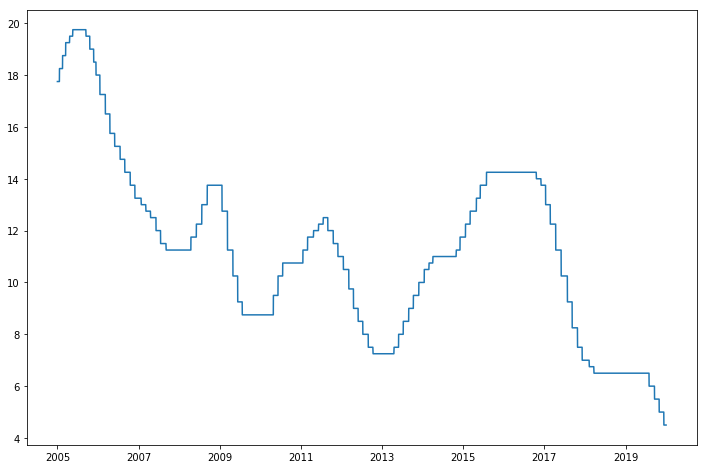

In [36]:
plt.subplots(figsize = (12,8))
plt.plot(selic)
plt.show()

- Inflação do Brasil

In [37]:
infla = quandl.get('BCB/13522',start_end = '2000-01-01')

In [38]:
infla.head()

,Value
Date,
1980-12-31,99.25
1981-01-31,99.67
1981-02-28,103.07
1981-03-31,101.03
1981-04-30,103.27


In [39]:
infla = infla.loc['2000-01-01':'2020-01-01']

In [50]:
infla = infla.rename(columns = {'Value':'IPCA'})

In [51]:
infla.head()

,IPCA
Date,
2000-01-31,8.85
2000-02-29,7.86
2000-03-31,6.92
2000-04-30,6.77
2000-05-31,6.47


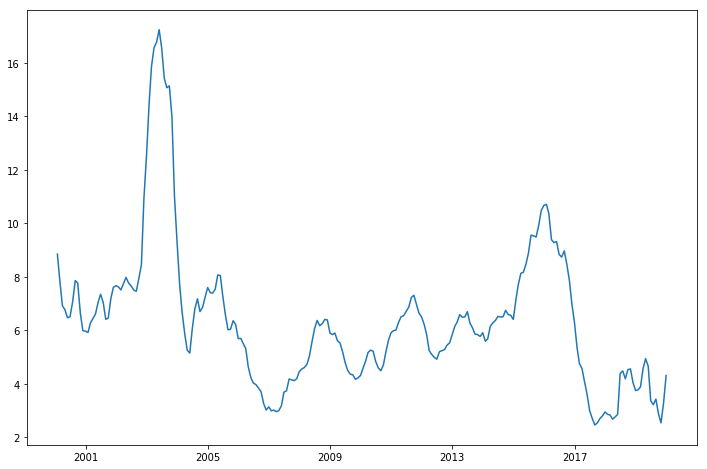

In [42]:
plt.subplots(figsize=(12,8))
plt.plot(infla)
plt.show()

- PIB Brasileiro

In [53]:
pib_br = quandl.get('ODA/BRA_NGDP',start_end='2000-01-01')

In [54]:
pib_br.head()

,Value
Date,
1990-12-31,0.011
1991-12-31,0.059
1992-12-31,0.627
1993-12-31,13.799
1994-12-31,349.258


In [55]:
pib_br = pib_br.loc['2000-01-01':'2020-01-01']
pib_br.rename(columns={'Value':"PIB"})

,PIB
Date,
2000-12-31,1199.06
2001-12-31,1315.71
2002-12-31,1487.51
2003-12-31,1716.25
2004-12-31,1955.24
2005-12-31,2168.24
2006-12-31,2406.72
2007-12-31,2718.30
2008-12-31,3107.99


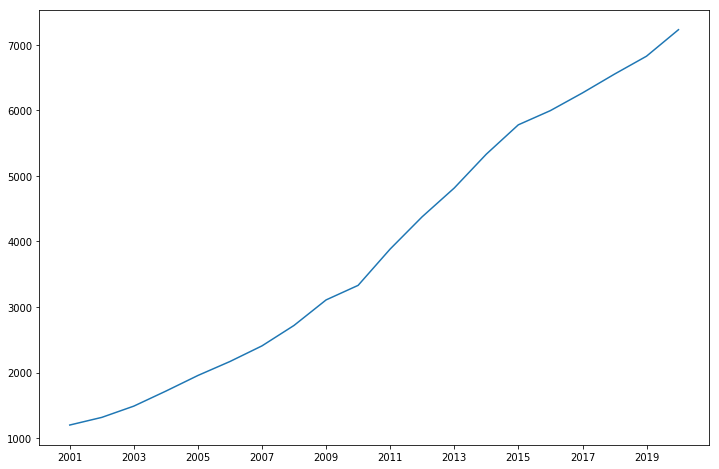

In [57]:
plt.subplots(figsize=(12,8))
plt.plot(pib_br)
plt.show()

- Cotação do Dolar

In [58]:
dolar = quandl.get('BCB/10813')

In [59]:
dolar.head()

,Value
Date,
1984-11-28,2814.0
1984-11-29,2814.0
1984-11-30,2867.0
1984-12-03,2867.0
1984-12-04,2867.0


In [66]:
dolar = dolar.loc['2000-01-01':'2020-01-01']
dolar = dolar.rename(columns = {'Value':'Dolar'})

In [67]:
dolar.head()

,Dolar
Date,
2000-01-03,1.8003
2000-01-04,1.8329
2000-01-05,1.8536
2000-01-06,1.8453
2000-01-07,1.8273


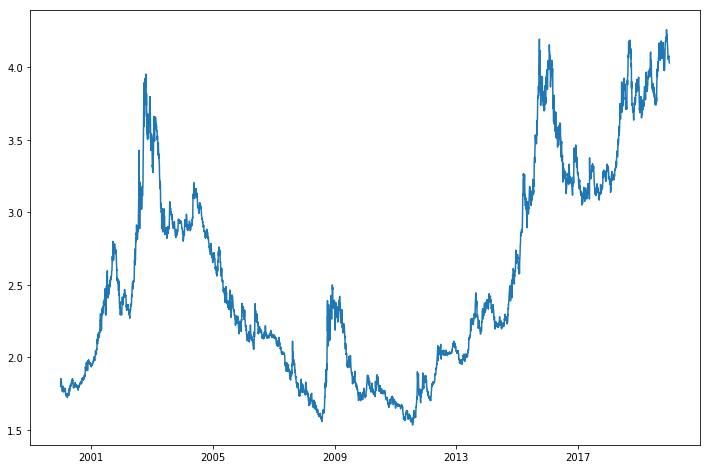

In [61]:
plt.subplots(figsize=(12,8))
plt.plot(dolar)
plt.show()

- Ouro

In [62]:
ouro = quandl.get('BCB/4')
ouro.head()

,Value
Date,
1989-12-29,315.0
1990-01-02,325.0
1990-01-03,348.0
1990-01-04,343.0
1990-01-05,348.0


In [68]:
ouro = ouro.loc['2000-01-01':'2020-01-01']
ouro = ouro.rename(columns = {'Value':'Ouro'})

In [69]:
ouro.head()

,Ouro
Date,
2000-01-03,17.00
2000-01-04,17.10
2000-01-05,16.90
2000-01-06,16.90
2000-01-07,16.85


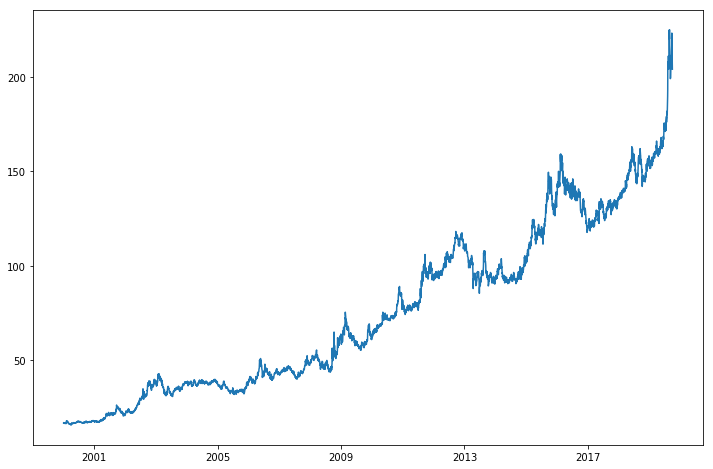

In [70]:
plt.subplots(figsize=(12,8))
plt.plot(ouro)
plt.show()

- CDI

In [71]:
cdi = quandl.get('BCB/4392')

In [72]:
cdi.head()

,Value
Date,
1986-03-31,18.24
1986-04-30,17.75
1986-05-31,17.98
1986-06-30,20.51
1986-07-31,27.27


In [73]:
cdi = cdi.rename(columns = {'Value':'CDI'})
cdi = cdi.loc['2000-01-01':'2020-01-01']

In [74]:
cdi.head()

,CDI
Date,
2000-01-31,18.73
2000-02-29,18.72
2000-03-31,18.70
2000-04-30,18.43
2000-05-31,18.44


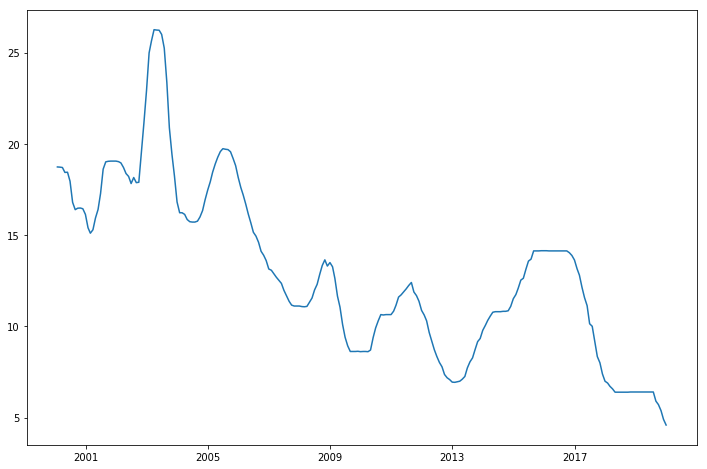

In [75]:
plt.subplots(figsize=(12,8))
plt.plot(cdi)
plt.show()

Por meio desse grafico vemos que a CDI acompanha a Taxa Selic

Agora vamos unir alguns indicadores macroeconomicos para ser possivel analisa-los, afim de encontrar alguma correlação entre as eles.

In [78]:
df = [wti_crude,infla,dolar,ouro,cdi,selic]

Vamos coletar os dados, apenas nas datas que eles tiverem em comum.

In [82]:
df_edit = reduce(lambda left, right : pd.merge(left,right , on = ['Date'], how ='inner'),df)

In [83]:
df_edit.head()

,Petroleo,IPCA,Dolar,Ouro,CDI,Selic
Date,,,,,,
2005-01-31,48.25,7.41,2.6240,35.60,17.92,18.25
2005-02-28,51.75,7.39,2.5942,36.50,18.44,18.75
2005-03-31,55.31,7.54,2.6654,36.90,18.89,19.25
2005-05-31,52.08,8.05,2.4030,32.75,19.57,19.75
2005-06-30,56.63,7.27,2.3496,33.10,19.73,19.75


Vamos criar uma matriz de correlação

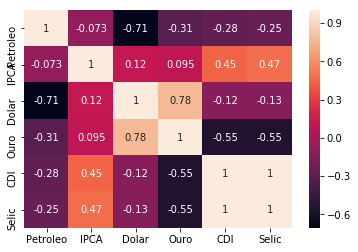

In [85]:
sns.heatmap(df_edit.corr(),annot = True)